In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings_df = pd.read_csv("ratings.csv")
movies_df = pd.read_csv("movies.csv")

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

## Exploratory data analysis

In [5]:
# Total number of movie ids
len(ratings_df["movieId"])

100836

In [6]:
# Total number of unique movie ids
#len(rating_df["movieId"].unique())
ratings_df["movieId"].nunique()

9724

In [7]:
# Total number of users
#len(rating_df["userId"].unique())
ratings_df["userId"].nunique()

610

In [8]:
# Average number of rating per user
#rating_df.groupby("userId")["rating"].describe()["count"].mean()
len(ratings_df)/ratings_df["userId"].nunique()

165.30491803278687

In [9]:
# Average number of rating per movie
#rating_df.groupby("movieId")["rating"].describe()["count"].mean()
len(ratings_df)/ratings_df["movieId"].nunique()

10.369806663924312

Text(0, 0.5, 'Frequency')

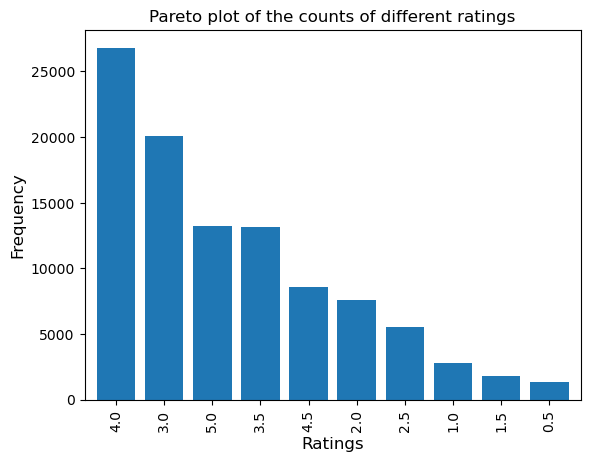

In [10]:
rating_counts = ratings_df["rating"].value_counts(ascending=False)

rating_counts.plot(kind='bar', width=0.8)

plt.title("Pareto plot of the counts of different ratings")
plt.xlabel('Ratings', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')

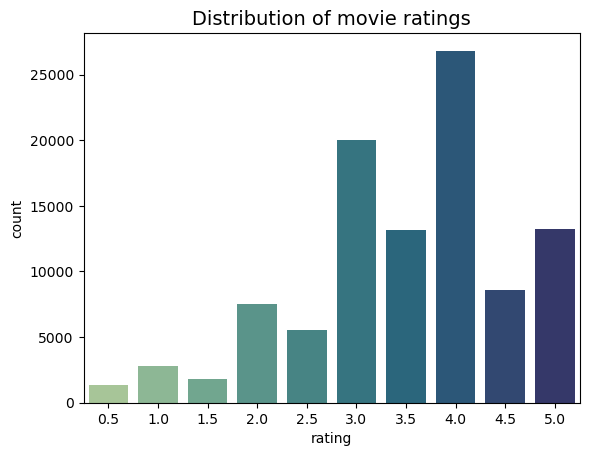

In [11]:
# distribution of movie rating
sns.countplot(ratings_df, x="rating", hue="rating", palette="crest", legend=False)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [12]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Data cleaning

In [13]:
duplicates = movies_df.duplicated(subset="movieId").sum()
print(f"Number of duplicate movieIds: {duplicates}")

Number of duplicate movieIds: 0


In [14]:
# Check for missing values
missing_values = movies_df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
movieId    0
title      0
genres     0
dtype: int64


# Exploratory Data Analysis (EDA)

In [15]:
# Genre Analysis
# Split genres and count occurrences
genres_series = movies_df['genres'].str.split('|').explode()
genre_counts = genres_series.value_counts()

# Display the top 10 genres
print('Top 10 Genres:')
print(genre_counts.head(10))

Top 10 Genres:
genres
Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: count, dtype: int64


In [16]:
# Yearly Distribution
# Extract year from the title
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# Count movies by year
movies_by_year = movies_df['year'].value_counts().sort_index()

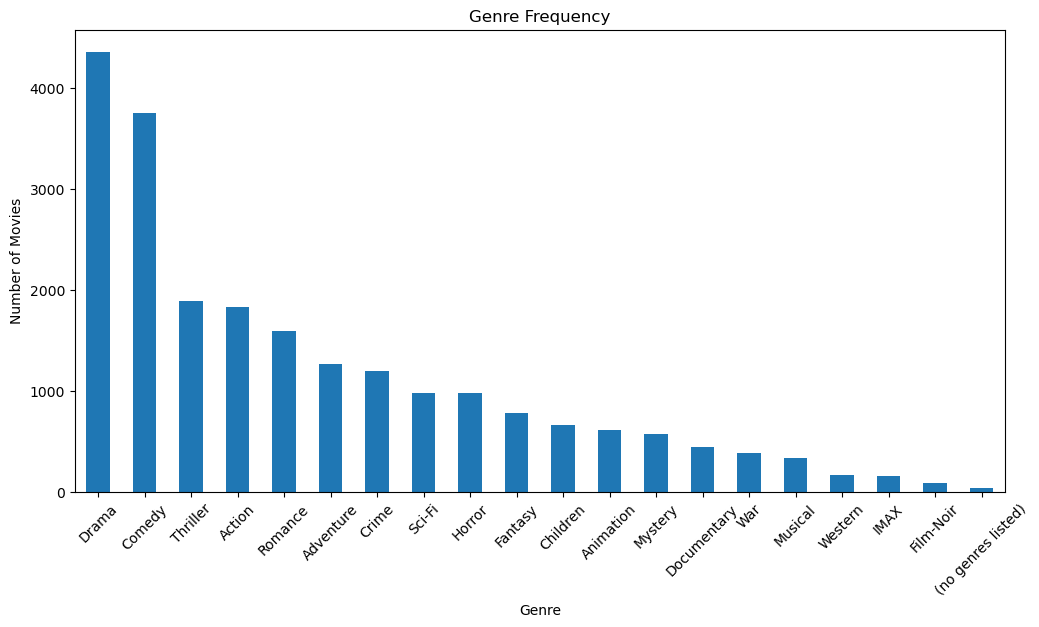

In [17]:
# Visualization
# Bar Chart of Genre Frequency
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

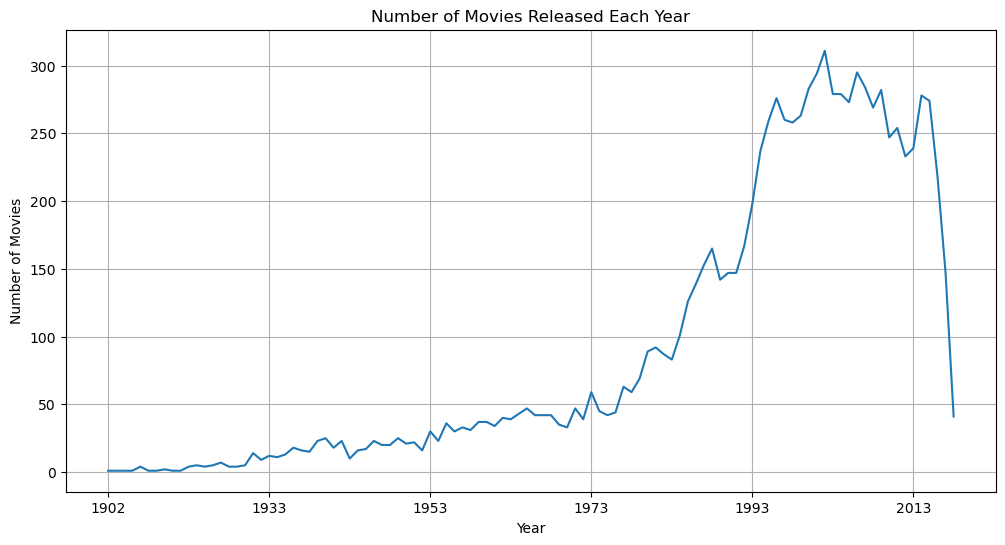

In [18]:
# Yearly Movie Count
plt.figure(figsize=(12, 6))
movies_by_year.plot(kind='line')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [19]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [20]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
#dict(zip(np.array(['a', 'b', 'c', 'd']), list(range(4))))
from scipy.sparse import csr_matrix
# generating the sparse matrix


In [22]:
def sparse_matrix_X(df):
    # number of rows
    n_rows = df["userId"].nunique()
    n_cols = df["movieId"].nunique()

    # mapping the unique users to whole numbers
    users_map = dict(zip(np.unique(df["userId"]), list(range(n_rows))))
    movies_map = dict(zip(np.unique(df["movieId"]), list(range(n_cols))))

    users_index = [users_map[i] for i in df["userId"]]
    movies_index = [movies_map[i] for i in df["movieId"]]

   # csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
   #     where ``data``, ``row_ind`` and ``col_ind`` satisfy the
   #     relationship ``a[row_ind[k], col_ind[k]] = data[k]``.

    X = csr_matrix((df["rating"], (users_index, movies_index)), shape = (n_rows, n_cols))

    return X

In [23]:
# (np.unique(ratings_df["userId"]) ==  ratings_df["userId"].unique()).sum() == len(ratings_df["userId"].unique())

In [24]:
# n_rows = ratings_df["userId"].nunique()
# n_cols = ratings_df["movieId"].nunique()

# users_map = dict(zip(ratings_df["userId"].unique(), range(n_rows)))

# users_idx = [users_map[i] for i in ratings_df["userId"]]


In [25]:
X = sparse_matrix_X(ratings_df)

In [26]:
X.shape

(610, 9724)

In [27]:
# Sanity check
sparsity = X.nnz / (X.shape[0] * X.shape[1])
print(f"Sparsity is: {sparsity*100:.1f}%")

Sparsity is: 1.7%


# Recommendations with k-Nearest Neighbors

In [28]:
from sklearn.neighbors import NearestNeighbors

In [33]:
X.shape

(610, 9724)

In [34]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
def find_similar_movies(movie_id, X, movies_map, k, metric="cosine"):
    # switch the movies id from column to row
    X = X.T
    movie_idx = movies_map[movie_id]
    movies_vec = X[movie_idx].reshape(1, -1)

    kNN = NearestNeighbors(n_neighbors = k+1, algorithm = "brute", metric = metric)
    kNN.fit(X)

    neighbours = kNN.kneighbors(movie_vec, return_distance=False)[0]
    
    return [movie_inv_mapper[n] for n in neighbours[1:]]